        data  temperatura  consumo_m3
0 2023-01-01     6.251629  234.300008
1 2023-01-02     5.239796  233.231513
2 2023-01-03     7.069672  242.518772
3 2023-01-04     9.078096  255.249985
4 2023-01-05     5.821165  228.742913


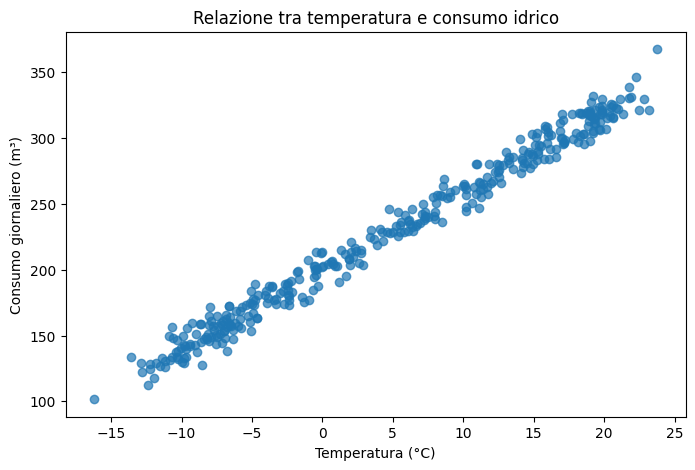

Errore medio assoluto: 6.49 m³
R²: 0.984


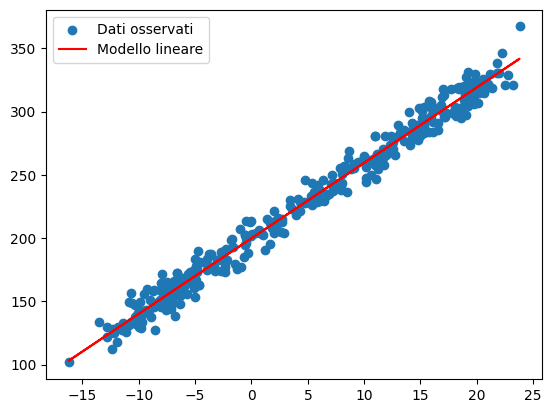

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import os

# --- Lettura o generazione dataset ---
os.makedirs("data", exist_ok=True)
csv_path = "data/consumo_giornaliero.csv"

if not os.path.exists(csv_path):
    np.random.seed(42)
    giorni = pd.date_range("2023-01-01", periods=365, freq="D")
    temperatura = 5 + 15*np.sin(2*np.pi*(giorni.dayofyear/365)) + np.random.normal(0, 2, 365)
    consumo = 200 + 6*temperatura + np.random.normal(0, 8, 365)
    df = pd.DataFrame({"data": giorni, "temperatura": temperatura, "consumo_m3": consumo})
    df.to_csv(csv_path, index=False)
else:
    df = pd.read_csv(csv_path, parse_dates=["data"])

print(df.head())

# --- Visualizziamo i dati ---
plt.figure(figsize=(8,5))
plt.scatter(df["temperatura"], df["consumo_m3"], alpha=0.7)
plt.xlabel("Temperatura (°C)")
plt.ylabel("Consumo giornaliero (m³)")
plt.title("Relazione tra temperatura e consumo idrico")
plt.show()

# --- Modello ---
X = df[["temperatura"]]
y = df["consumo_m3"]

model = LinearRegression().fit(X, y)
pred = model.predict(X)

mae = mean_absolute_error(y, pred)
r2 = r2_score(y, pred)
print(f"Errore medio assoluto: {mae:.2f} m³")
print(f"R²: {r2:.3f}")

plt.scatter(df["temperatura"], df["consumo_m3"], label="Dati osservati")
plt.plot(df["temperatura"], pred, color="red", label="Modello lineare")
plt.legend()
plt.show()